In [1]:
# Setting up by importing all the relevant libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import misc

In [2]:
# User Inputs
dir_name = 'C:\Users\\ankuarora\Desktop\Client\\2017_05_CogEx\\2017_07_R2Implementation\Formsforinput'
base_filename = 'CMS1500_FrasierClean.png'

In [3]:
# Loading the CMS1500 Form in the form of an array
img_form = cv2.imread(os.path.join(dir_name, base_filename))
# Converting the BGR image into a Grayscale image
img_form_gray = cv2.cvtColor(img_form, cv2.COLOR_BGR2GRAY)
# Checking details about the loaded image
print(img_form_gray.shape, img_form_gray.size, img_form_gray.dtype)

((3300L, 2550L), 8415000, dtype('uint8'))


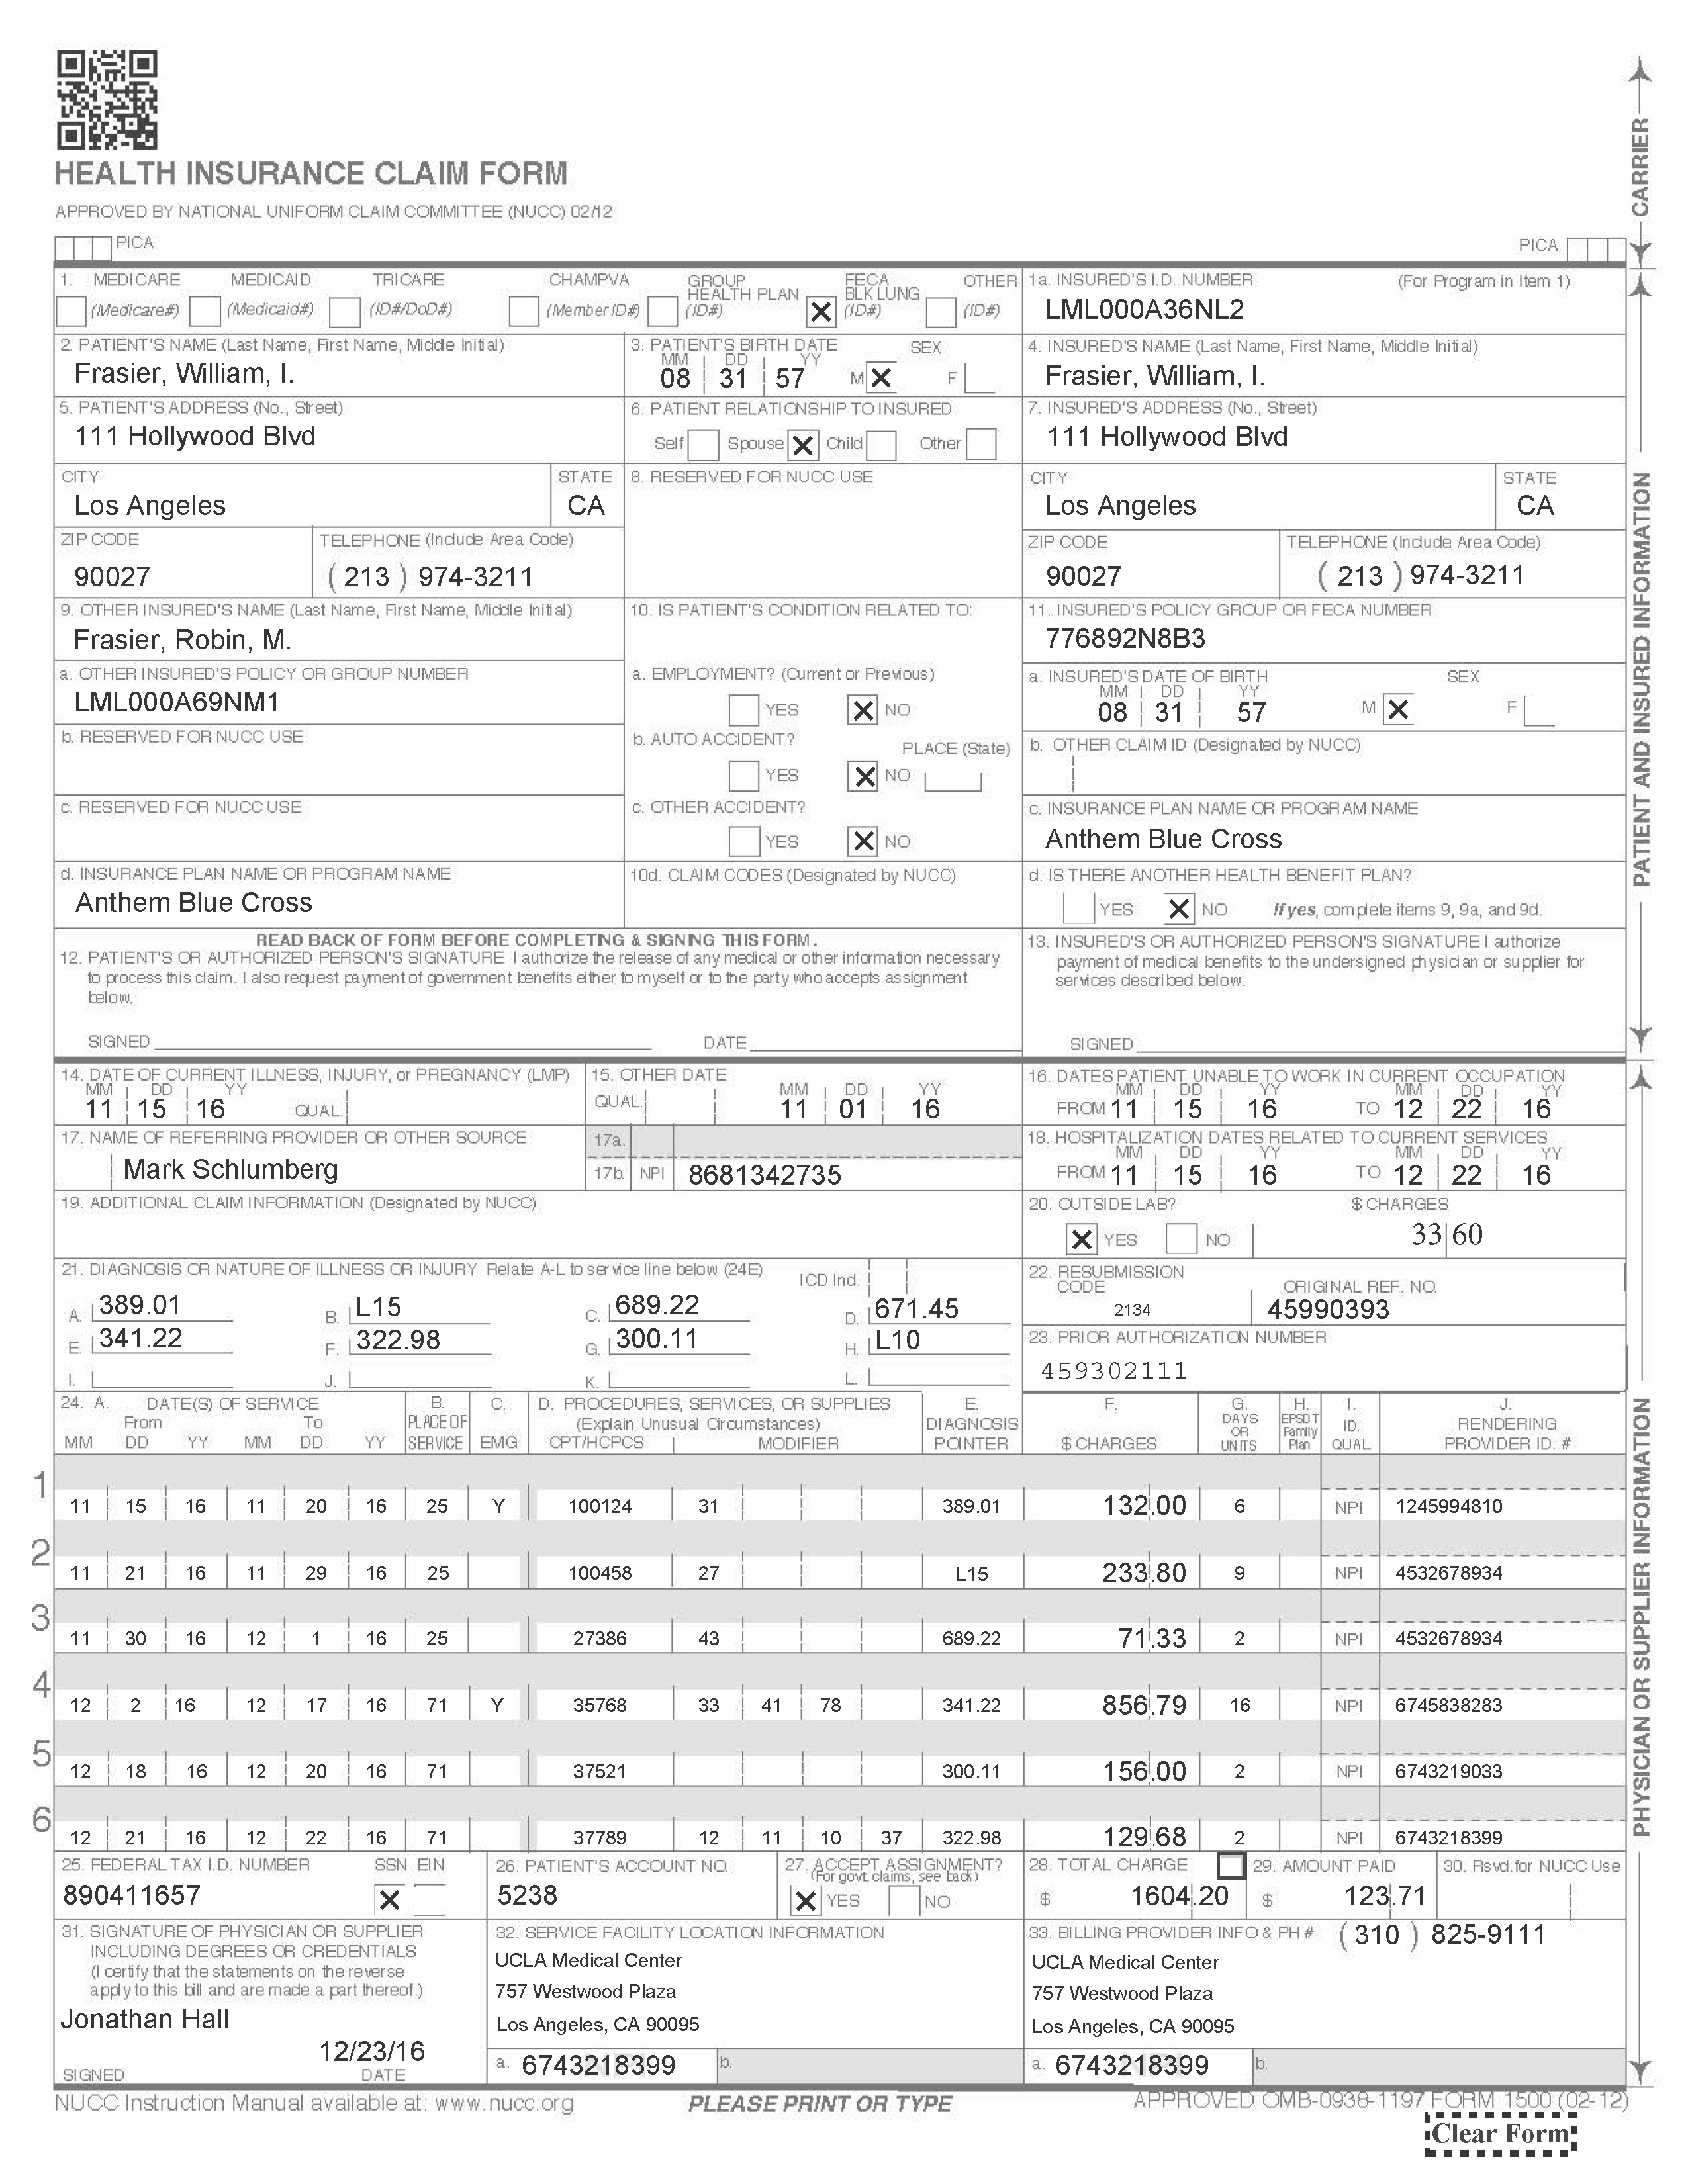

In [4]:
misc.toimage(img_form_gray)

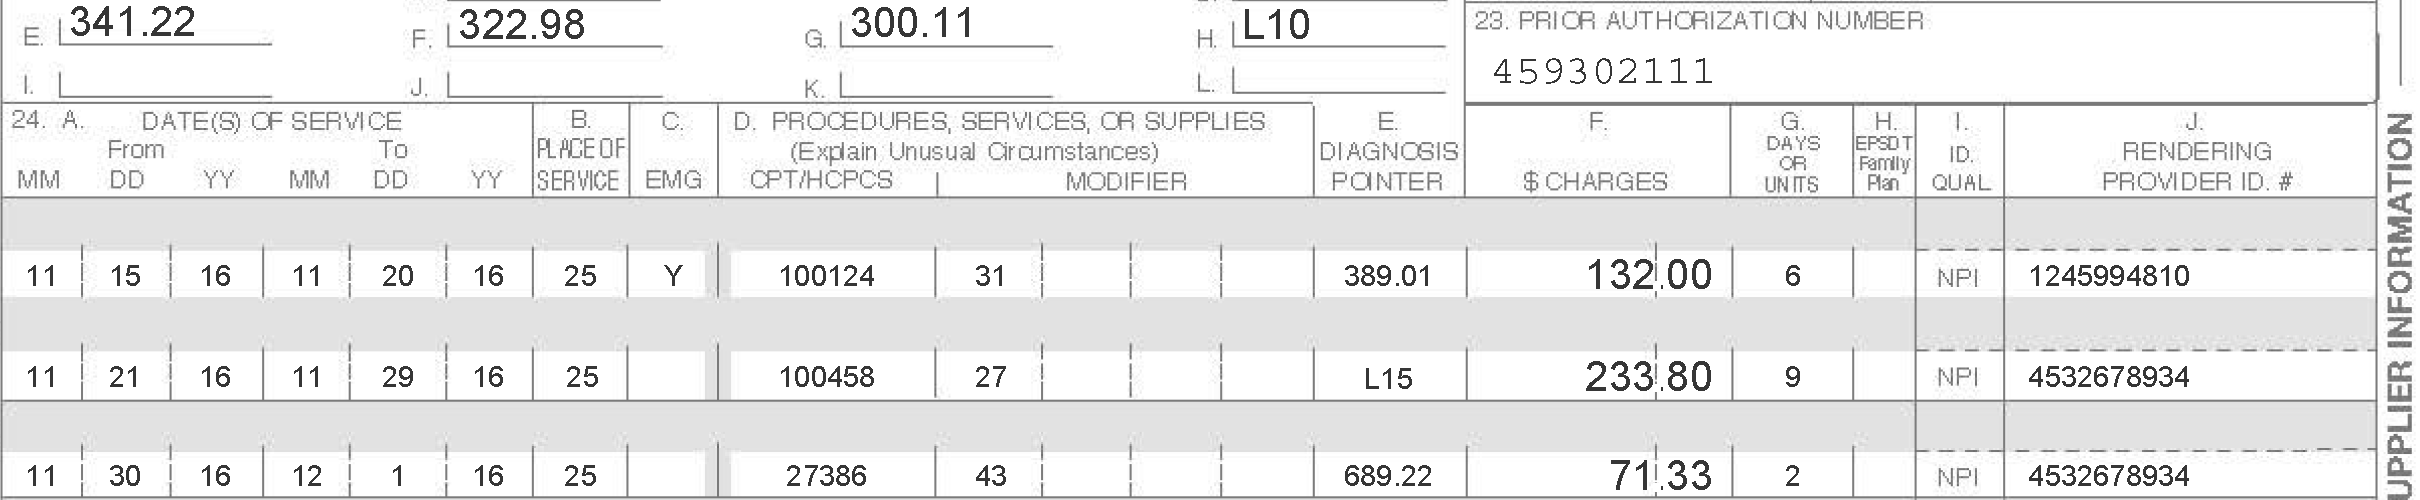

In [8]:
# Define a global reference marker for CMS1500
form_marker = img_form_gray[2200:200, 80:2500]
misc.toimage(form_marker)

In [7]:
# Save the reference marker as a png file
img_form_marker = misc.toimage(form_marker)
misc.imsave(os.path.join(dir_name,'references\\form_marker.png'), img_form_marker)

In [235]:
# Define reference markers for individual elemsnts
form_xy = np.array([[350,450,80,1510],
                    [440,485,1500,2310],
                    [540,585,80,750],
                    [510,570,930,1240],
                    [520,575,1250,1495]
                   ])

In [237]:
for i in range(form_xy.shape[0]):
    element_marker = img_form_gray[form_xy[i,0]:form_xy[i,1],form_xy[i,2]:form_xy[i,3]]
    img_element_marker = misc.toimage(element_marker)
    misc.imsave(os.path.join(dir_name,'references\\element_marker_' + str(i) + '.png'), img_element_marker)

#### Converting image to JSON

In [10]:
import base64
import io

In [12]:
in_mem_file = io.BytesIO()
img_form_marker.save(in_mem_file, format = "PNG")
# reset file pointer to start
in_mem_file.seek(0)
img_bytes = in_mem_file.read()

base64_encoded_result_bytes = base64.b64encode(img_bytes)
# base64_encoded_result_str = base64_encoded_result_bytes.decode('ascii')

In [13]:
print base64_encoded_result_bytes

iVBORw0KGgoAAAANSUhEUgAAA5gAAABuCAAAAABngOP4AACNiklEQVR4nOz9V7BmWXYeiK213bG/v/7mTV9ZVVm+qrurutqh0Wig0QRJEHTDIRUzoxEZilEoQtKDQo/S00RMSIoJ6YWh0XDIGIHU0EADEB6N9l3d1d3V5X1Wpb3e/ObYbZcebpqbmVVogGQDiWB+FZG3zvn32Wefc/baa+1lkeA+/nLgxpfCP+XxfygEwCOd0l39X78v3X3+5nUEQMDu6vfw13D9mN/R/437ftxz3jlz2R1n72x/+5u5+znuLeB9wvzLgp9GeD8rwrzzHnjH8Q2KvEVQh//7pxoH3Rr3nYT7J43ho/BxC9SfaTz3DMRf9ADu46fhpy2df9ql9c52fyZOS4ccDI+0ohvX0m0sFQiQ7uj847vG28Zxdzu6cf7unz6Cc992Ktw8/2cYzz2D+4R5z+PGBPsIURAA/vQcJ9xxzO84z+FjEYiIAIHdPqUJCAgQAQCPjOcWHVy/DhE/YnB02MFNOECGiEfvcHg9HK4Hd05Ve9fz3X69u/6X3RgPEVEggLvvcw/iPmH+pYW//vdPKwL+O4MohEDEEG/bRxIAERAgHZ7X18/LG62uXweIjMHdhGCAgI4QZkBkjB2h4RvXAwJ+BGHqO47h+vU3bnSDMNX18YSj42EfuVbcQ7g1uhYMgAGAFqAFsgAARARgawANNjgACKE14HQAa2ACvoISYAIagEoA8uAtgAaY7BqoHNDRZY0AKphYDRVAuDmrAErwFlxDVe18a/Sk1cboupxBvV8DaA87sBGqFuD6V/QaYOqgMi0AgD2ybhJAa3Z9awCCDQVswpSm0EIA74AAwLW+qEtowVFwNRiCydiMdysznTVjGANoIA0eNLRw4CYFeA0QQiAA8trDPmkHBjS0LRRt68bGjPVM+03Yhf22aRuAAsD7AADkAjiC1lVNNbVVARU0FsAHcqABGjPVB0FP6zK03msHEMoQJm7d